# Python Libraries for Data Analytics & Data Science
- **	NumP**y: A library that makes a variety of mathematical and statistical operations easier; it is also the basis for many features of the pandas library. NumPy is implemented in the C language and hence provides much faster array processing performance as required for large sets of data in a distributed- **•	Matplotl**ib: A visualization library that makes it quick and easy to generate graphs and charts from our data- **
•	Seab**orn – modern visualization package built on Matplotl- **P
•	pa**ndas: A Python library created specifically to facilitate working with data. This is the bread and butter of a lot of Python data-science wo- **.
•	scikit-**learn: Probably the most popular library for machine learning in Py

- **Working with Numpy** thon.


In [1]:
import numpy as np
np.array([1, 2, 3])


array([1, 2, 3])

**numpy arrays** share many properties with Python lists

In [2]:
a = np.array([1, 3, 2])
len(a)
a.sort()
a

array([1, 2, 3])

**arange** : In analogy with the list range() function, we can create array ranges in NumPy using np.arange()

In [3]:
r = np.arange(17)
r

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

Computations with numpy arrays are **much faster** than the corresponding operations with lists. Because NumPy itself is array-based, such computations **can also typically be expressed much more compactly**, without the need for loops or even comprehensions. In particular, NumPy arrays support vectorized operations, whereby we can (say) multiply every element in an array by a particular number all at once.

Import the numPy, Matplotlib and pandas libraries into the Python interpreter
Then load the data set for the Nobel Laureates and show the summary stats for numeric fields

In [4]:
[3 * i for i in r]   # This is Python can be expressed more compactly as 
3 * a                # in numpy

array([3, 6, 9])

**timeit** - we can use the timeit library to compare execution speeds for normal
Python and numpy structures. It Python let's do some heavy computation and time it:

In [5]:
%%timeit
[i**2 for i in range(1000)]

349 µs ± 19.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


using numpy?  -- You should see a huge difference in speeds!

In [6]:
%%timeit
np.arange(1000)**2

1.92 µs ± 22.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Numpy also provides support for **multi-dimensional arrays**

In [7]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

# **Data Visualization with Matplotlib**
Matplotlib is a powerful visualization tool for Python that can do an absurdly large number of awesome things.
The exact mechanics of getting Matplotlib plots to display varies widely depending on the exact details of your setup. The most explicit way to show plots, which works on most systems from the REPL, is to use the show() method:


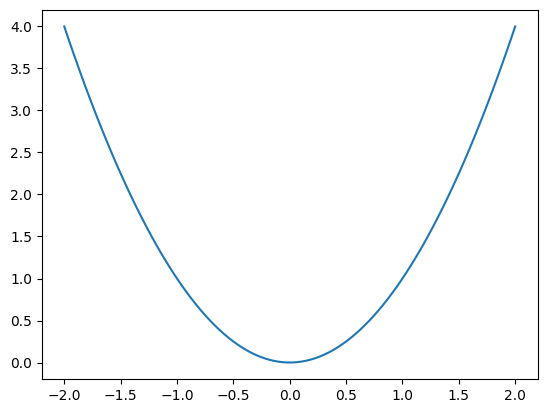

In [8]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-2, 2, 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, x*x)
plt.show()
%matplotlib inline

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

nobel = pd.read_csv("laureates.csv")
nobel.describe()

FileNotFoundError: [Errno 2] No such file or directory: 'laureates.csv'

In [ ]:
nobel.head(10)

In [ ]:
nobel.info()

Let’s use array square brackets and a boolean criterion on the "surname" column to find record for the Physics noble laureate Feynman 

In [ ]:
nobel[nobel["surname"] == "Feynman"]

In [ ]:
nobel[nobel["surname"] == "Feynman"].year

By using the correct index (i.e., 86), we can confirm that the value in that case is True:

In [ ]:
(nobel["surname"] == "Feynman")[86]

Another method for getting the year is by specifying the column along with the boolean criterion, which we might try like this (only the most relevant line of output is shown). This returns just the overall id (in this case, 86) and the column of interest.

In [ ]:
nobel.loc[nobel["surname"] == "Feynman", "year"]

Finding a record by substring.

In [ ]:
nobel.loc[nobel["firstname"].str.contains("Kip")]

Let's do sring search on a surname that produces multiple values
>> nobel.loc[nobel["surname"].str.contains("Feynman")]  # fails because of too many NaNs
>> Below shows the culprits 

In [ ]:
nobel.loc[nobel["surname"].isnull()]

Here's how to filter NaNs - using by passing the option na=False to contains():

In [ ]:
nobel.loc[nobel["surname"].str.contains("Feynman", na=False)]

Although there’s only one Nobel laureate named “Feynman”, there are famously several named “Curie”
Let's see dind Curies in the laureates.csv dataset.

In [ ]:
curies = nobel.loc[nobel["surname"].str.contains("Curie", na=False)]
curies

With the result assigned to the variable curies we can get the first name and surname for each Curie laureate as follows:

In [ ]:
curies[["firstname", "surname"]]

Marie Skłodowska-Curie is the only person to win a Nobel Prize for two different sciences. 
Let’s use pandas to see if there are any other multiple Nobel prize winners.
We use groupby() to group the winners by name and then use the size() method to see how many there are:

In [ ]:
nobel.groupby(["firstname", "surname"]).size()

Let's add sort_values() to find any multiple laureates:

In [ ]:
nobel.groupby(["firstname", "surname"]).size().sort_values()

Even better is to use ID and groupby

In [ ]:
laureates = nobel.groupby(["id", "firstname", "surname"])
sizes = laureates.size()
sizes[sizes > 1]

One of pandas’ greatest strengths is its ability to deal with times and time series, so let’s start by taking a look at selecting dates. One way we can do this is by searching for laureates by exact birthday as a string

In [ ]:
nobel.loc[nobel["born"] == "1879-03-14"]

Einstein birthday March 14 or 3/14 is labeled as Pi Day in America -  the first three digits of π ≈ 3.14. Another popular Math constant is Tau = 2*π = 6.28 - which by calendar will be 6/28. Let's see if any laureates have this birthday

In [ ]:
nobel.loc[nobel["born"].str.contains("06-08", na=False)]

We can narrow down by restricting the results to Nobel laureates in Physics using the & operator to perform a logical and as follows

In [ ]:
nobel.loc[(nobel["born"].astype('string').str.contains("06-28")) & (nobel["category"] == "physics")]

Let’s take a look at the first record using iloc (“index location”) to find it by its index number, which is 79:

In [ ]:
nobel.iloc[79]

Speaking of birthdates, the lifespans of Nobel laureates have been the subject of some scientific research over the years. An interesting exercise is to compute the lifespan of each nobel laurettes using the year of birth and year of death
We will do this by creating a new lifespan colunn in the dataframe and using NumPy's magic time delta
nobel["lifespan"] = (nobel["died"] - nobel["born"])/np.timedelta64(1, "Y")